In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")  # make sure titanic.csv is in the same folder

# Display first 5 rows
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [11]:
print(df.info())        # data types and missing values
print(df.describe())   # summary statistics for numeric columns

print("\n=== Mean ===")
print(df.mean(numeric_only=True))

print("\n=== Median ===")
print(df.median(numeric_only=True))

print("\n=== Standard Deviation ===")
print(df.std(numeric_only=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
m

In [3]:
# Check missing values
print(df.isnull().sum())

# Fill missing Age with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Drop column with too many missing values (example)
df = df.drop(columns=['Cabin'], errors='ignore')


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


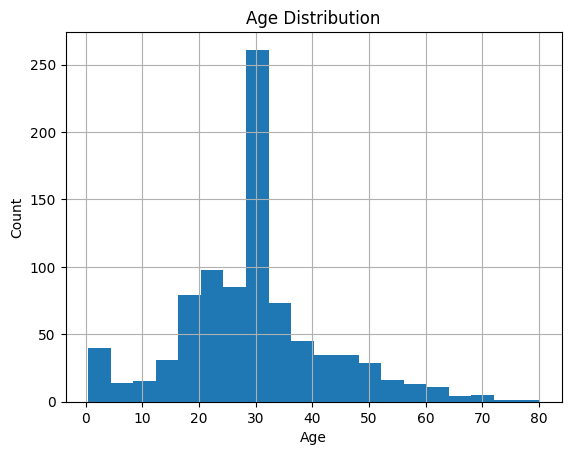

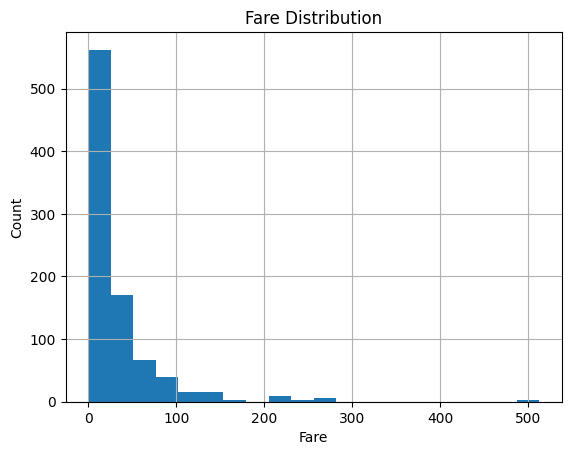

In [4]:
import matplotlib.pyplot as plt

df['Age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

df['Fare'].hist(bins=20)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


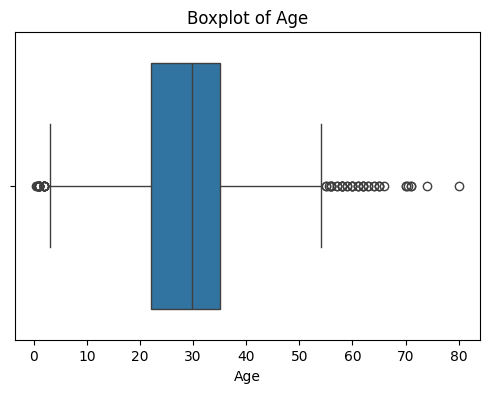

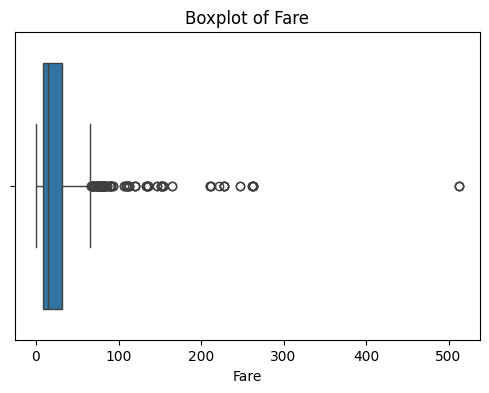

In [5]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()


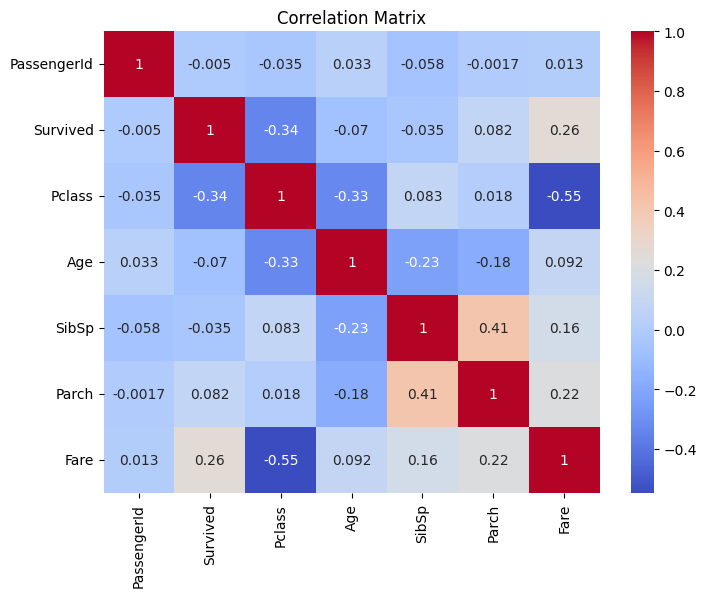

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


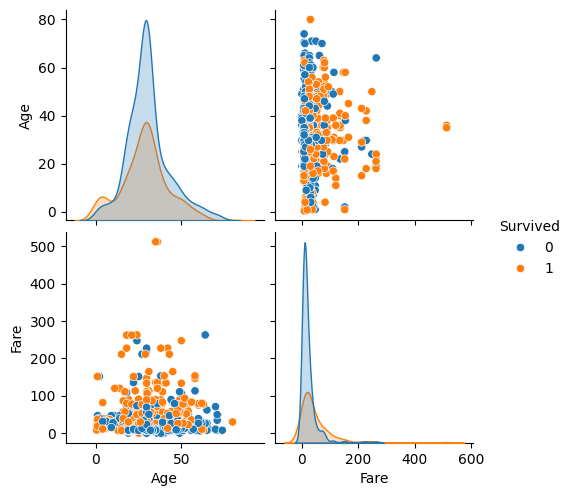

In [7]:
sns.pairplot(df[['Age', 'Fare', 'Survived']].dropna(), hue='Survived')
plt.show()


In [8]:
# Survival rate by gender
print(df.groupby('Sex')['Survived'].mean())

# Survival rate by passenger class
print(df.groupby('Pclass')['Survived'].mean())


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [9]:
import plotly.express as px

fig = px.histogram(df, x="Age", color="Survived", nbins=30, title="Age vs Survival")
fig.show()
